In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge,ElasticNet, LogisticRegressionCV
from sklearn.metrics import roc_auc_score, mean_squared_error, classification_report, accuracy_score,  confusion_matrix, precision_score, recall_score, f1_score, fbeta_score, precision_recall_curve


In [63]:
weather_data=pd.read_csv('https://raw.githubusercontent.com/Vladcder/ML_Homework/refs/heads/main/weather.csv')

In [64]:
weather_data.head()

,data_ref,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),Cloud Cover (%),Wet Bulb Temperature (deg F),Relative Humidity (%),Air Pressure (hPa),Dew Point Category,Wind Direction,Daily Solar Panel Efficiency
0,4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea,01/04/2014,-,2,2,2,28.4,32.4,7.5,25.9,8.07,18.0,-59.3,100.0,1006,VH,W,High
1,c9d3c825-fd94-4e61-a4bc-2cf0f2208de0,02/04/2014,0,0,0,--,28.8,32.6,--,33.1,7.57,23.0,59.2,100.0,1005,Very High,S,Medium
2,6d445ffb-d4c2-4f94-a27e-224fabe46d10,03/04/2014,0,0,0,0,29.3,--,--,43.2,6.72,16.0,59.7,98.5,1005,Low,E,Medium
3,7a404c50-710f-451a-9a42-a66bb783a3d0,04/04/2014,0,0,0,0,28.6,32.4,7.4,33.1,7.55,20.0,59.1,100.0,1011,Very High,W,Medium
4,0d3194a7-ad1a-456e-9bf8-b1bae730977b,05/04/2014,23.4,15.2,17.2,17.4,26.4,28,5.4,28.1,5.27,74.0,58.9,100.0,1012,Very High,east,Low


In [65]:
len(weather_data)

3517

Предподготовка данных

In [66]:
new_data=weather_data.drop_duplicates()
new_data=new_data.dropna()
values_to_drop = ['--', '-']
new_data = new_data[~new_data.apply(lambda row: row.astype(str).isin(values_to_drop).any(), axis=1)]
len(new_data)

1390

In [67]:
standardization_map_dew_point = {
    'Very High': 'Very High',
    'very high': 'Very High',
    'Extreme': 'Very High',
    'VH': 'Very High',
    'VERY HIGH': 'Very High',

    'High': 'High',
    'H': 'High',
    'High Level': 'High',
    'high': 'High',
    'HIGH': 'High',

    'Moderate': 'Moderate',
    'Normal': 'Moderate',
    'M': 'Moderate',
    'MODERATE': 'Moderate',
    'moderate': 'Moderate',

    'Low': 'Low',
    'LOW': 'Low',
    'low': 'Low',
    'L': 'Low',
    'Below Average': 'Low',

    'Very Low': 'Very Low',
    'very low': 'Very Low',
    'VERY LOW': 'Very Low',
    'VL': 'Very Low',
    'Minimal': 'Very Low'
}

In [68]:
standardization_map_wind_direction = {
    'N': 'North',
    'NORTH': 'North',
    'north': 'North',
    'Northward': 'North',
    'N.': 'North',

    'NE': 'Northeast',
    'northeast': 'Northeast',
    'NORTHEAST': 'Northeast',
    'NE.': 'Northeast',

    'E': 'East',
    'EAST': 'East',
    'east': 'East',
    'E.': 'East',

    'SE': 'Southeast',
    'southeast': 'Southeast',
    'SOUTHEAST': 'Southeast',
    'SE.': 'Southeast',

    'S': 'South',
    'SOUTH': 'South',
    'south': 'South',
    'Southward': 'South',
    'S.': 'South',

    'SW': 'Southwest',
    'SW.': 'Southwest',

    'W': 'West',
    'WEST': 'West',
    'west': 'West',
    'W.': 'West',

    'NW': 'Northwest',
    'northwest': 'Northwest',
    'NORTHWEST': 'Northwest',
    'NW.': 'Northwest'
}

In [69]:
new_data.loc[:, 'Dew Point Category'] = new_data['Dew Point Category'].replace(standardization_map_dew_point)
new_data.loc[:, 'Wind Direction'] = new_data['Wind Direction'].replace(standardization_map_wind_direction)
new_data=new_data.drop(columns=['data_ref', 'date'])

In [70]:
category_order = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']#замена категориальных признаков
new_data['Dew Point Category'] = pd.Categorical(new_data['Dew Point Category'], categories=category_order, ordered=True)
new_data['Dew Point Category'] = new_data['Dew Point Category'].cat.codes


In [71]:
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
new_data['Daily Solar Panel Efficiency']  = new_data['Daily Solar Panel Efficiency'].replace(mapping)
for feature in new_data.columns[:8]:
  new_data[feature]=new_data[feature].astype(np.float32)

<ipython-input-71-bd080161f5cc>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [72]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1390 entries, 3 to 3196
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Daily Rainfall Total (mm)      1390 non-null   float32
 1   Highest 30 Min Rainfall (mm)   1390 non-null   float32
 2   Highest 60 Min Rainfall (mm)   1390 non-null   float32
 3   Highest 120 Min Rainfall (mm)  1390 non-null   float32
 4   Min Temperature (deg C)        1390 non-null   float32
 5   Maximum Temperature (deg C)    1390 non-null   float32
 6   Min Wind Speed (km/h)          1390 non-null   float32
 7   Max Wind Speed (km/h)          1390 non-null   float32
 8   Sunshine Duration (hrs)        1390 non-null   float64
 9   Cloud Cover (%)                1390 non-null   float64
 10  Wet Bulb Temperature (deg F)   1390 non-null   float64
 11  Relative Humidity (%)          1390 non-null   float64
 12  Air Pressure (hPa)             1390 non-null   int64 

In [73]:
new_data.describe()

,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),Cloud Cover (%),Wet Bulb Temperature (deg F),Relative Humidity (%),Air Pressure (hPa),Dew Point Category,Daily Solar Panel Efficiency
count,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000
mean,5.540719,3.142877,3.892086,4.453094,28.079712,31.721943,8.800863,29.816620,7.004763,28.956835,53.241295,97.391583,1008.756835,3.210072,0.943165
std,14.118900,6.572249,8.492293,9.920053,1.086473,1.482740,2.949847,14.844566,1.446375,21.147489,25.259900,4.962085,3.530573,0.926631,0.681183
min,0.000000,0.000000,0.000000,0.000000,23.100000,24.100000,3.500000,-59.799999,0.000000,4.000000,-60.300000,70.700000,998.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,27.400000,31.000000,6.500000,27.799999,6.680000,17.000000,58.400000,96.700000,1006.000000,3.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,28.200001,32.000000,8.100000,31.500000,7.420000,21.000000,58.900000,100.000000,1009.000000,3.000000,1.000000
75%,4.000000,2.600000,3.000000,3.400000,28.900000,32.700001,10.800000,35.299999,7.860000,30.000000,59.400000,100.000000,1011.000000,4.000000,1.000000
max,210.600006,49.799999,69.800003,85.599998,30.600000,35.000000,21.400000,70.599998,9.150000,100.000000,61.800000,100.000000,1019.000000,4.000000,2.000000


In [74]:
new_data.head()

,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),Cloud Cover (%),Wet Bulb Temperature (deg F),Relative Humidity (%),Air Pressure (hPa),Dew Point Category,Wind Direction,Daily Solar Panel Efficiency
3,0.0,0.0,0.000000,0.0,28.6,32.400002,7.4,33.099998,7.55,20.0,59.1,100.0,1011,4,West,1
4,23.4,15.2,17.200001,17.4,26.4,28.000000,5.4,28.100000,5.27,74.0,58.9,100.0,1012,4,East,0
5,0.2,0.2,0.200000,0.2,28.0,32.500000,10.4,34.599998,7.39,13.0,59.1,81.7,1009,3,Northeast,0
8,1.8,1.4,1.800000,1.8,27.6,34.000000,7.2,-37.099998,7.13,10.0,-59.3,100.0,1006,4,South,1
10,2.8,1.4,2.600000,2.8,27.5,33.000000,6.1,34.599998,7.18,37.0,58.7,100.0,1006,3,Northeast,1


In [75]:
dummy_data = pd.get_dummies(new_data, columns =['Wind Direction', 'Dew Point Category'], dtype=np.uint8)


In [76]:
dummy_data.head()

,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),Cloud Cover (%),...,Wind Direction_Northwest,Wind Direction_South,Wind Direction_Southeast,Wind Direction_Southwest,Wind Direction_West,Dew Point Category_0,Dew Point Category_1,Dew Point Category_2,Dew Point Category_3,Dew Point Category_4
3,0.0,0.0,0.000000,0.0,28.6,32.400002,7.4,33.099998,7.55,20.0,...,0,0,0,0,1,0,0,0,0,1
4,23.4,15.2,17.200001,17.4,26.4,28.000000,5.4,28.100000,5.27,74.0,...,0,0,0,0,0,0,0,0,0,1
5,0.2,0.2,0.200000,0.2,28.0,32.500000,10.4,34.599998,7.39,13.0,...,0,0,0,0,0,0,0,0,1,0
8,1.8,1.4,1.800000,1.8,27.6,34.000000,7.2,-37.099998,7.13,10.0,...,0,1,0,0,0,0,0,0,0,1
10,2.8,1.4,2.600000,2.8,27.5,33.000000,6.1,34.599998,7.18,37.0,...,0,0,0,0,0,0,0,0,1,0


In [77]:
dummy_data['Daily Solar Panel Efficiency'].value_counts()

,count
Daily Solar Panel Efficiency,
1,741
0,364
2,285


Визуализация данных

графики рассеяния

In [78]:
nrows = 4
ncols = 4
fig = make_subplots(rows=nrows, cols=ncols)
for idx, feature in enumerate(new_data.columns[:-1]):  # Exclude the last column 'class'
    row = idx // ncols + 1
    col = idx % ncols + 1
    scatter = go.Scatter(
        x=new_data[feature],
        y=new_data['Daily Solar Panel Efficiency'],
        mode='markers',
        name=feature,
    )

    fig.add_trace(scatter, row=row, col=col)
    fig.update_xaxes(title_text=feature, row=row, col=col)
    fig.update_yaxes(title_text='Daily Solar Panel Efficiency', row=row, col=col)
fig.update_layout(height=1000, width=1500, title_text="Scatter Plots of Features by Daily Solar Panel Efficiency")
fig.show()

Выбросы

In [79]:
n_rows=4
n_cols=4
fig = make_subplots(rows=n_rows, cols=n_cols)

b_row = 1
b_col = 1
i = 0

for feature in new_data.columns[:8]:
    Q1 = new_data[feature].quantile(0.25)
    Q3 = new_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = new_data[(new_data[feature] < lower_bound) | (new_data[feature] > upper_bound)]
   #new_data = new_data[~outliers]
    fig.add_box(y=new_data[feature], row=b_row, col=b_col, name=feature)
    fig.add_annotation(
        x=0.5,
        y=max(new_data[feature]),
        text=f"Outliers: {len(outliers)}",
        showarrow=False,
        font=dict(size=12),
        row=b_row,
        col=b_col
    )
    i += 1
    b_col += 1
    if b_col == n_cols+1:
        b_col = 1
        b_row += 1
fig.update_layout(height=1000, width=1500, title_text="Box Plots of Features by Daily Solar Panel Efficiency")
fig.show()

Матрица корреляции

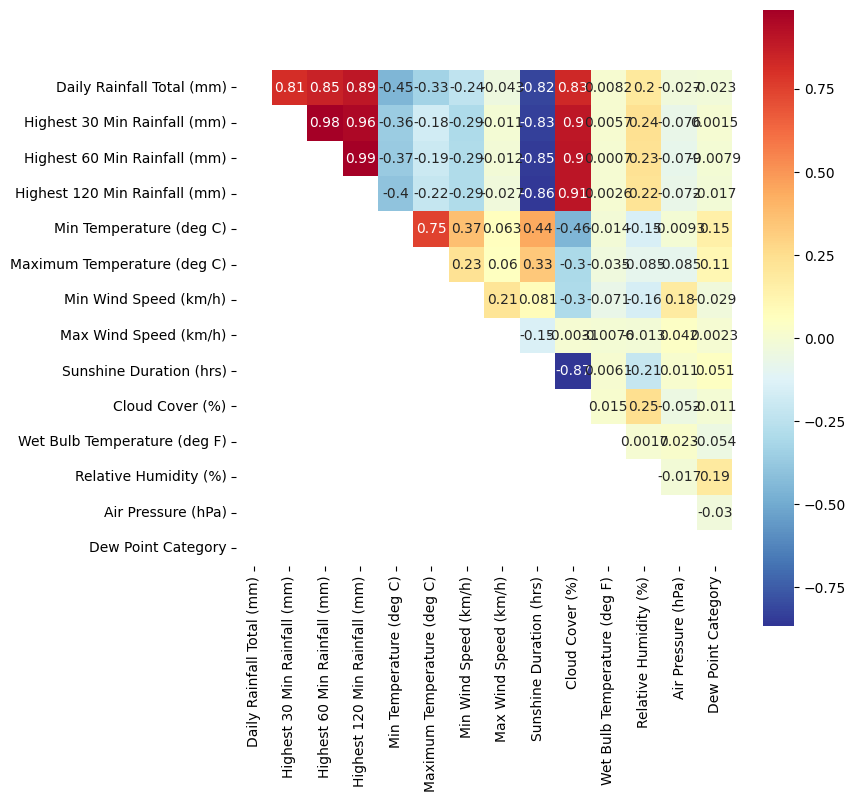

In [80]:
corrs = new_data.drop(columns=['Wind Direction','Daily Solar Panel Efficiency']).corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(bool))
plt.figure(figsize=(8, 8))
sns.heatmap(upper_tri, cmap="RdYlBu_r", square=True, annot=True);

In [81]:
new_data=new_data.drop(columns=['Highest 30 Min Rainfall (mm)',	'Highest 60 Min Rainfall (mm)',	'Highest 120 Min Rainfall (mm)'])#Данные признаки были удалены после анализа матрицы корреляции

Разбиение датасета

In [82]:
X_train, X_test, y_train, y_test=train_test_split(
    dummy_data.drop(columns='Daily Solar Panel Efficiency'),
    dummy_data['Daily Solar Panel Efficiency'],
    random_state=2024,
    test_size=0.2
)

In [83]:
y_train.value_counts()

,count
Daily Solar Panel Efficiency,
1,585
0,294
2,233


Нормировка значений

In [84]:
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled=pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

Обучение бейзлайновой модели

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_scaled, y_train);

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
log_reg.fit(X_train_scaled, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



In [ ]:
y_pred_dummy = dummy_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred_dummy)

0.5301837270341208

In [ ]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_score(y_test, y_pred_log_reg)

0.7506561679790026

In [ ]:
confusion_matrix(y_test, y_pred_dummy)

array([[  0,  95,   0],
       [  0, 202,   0],
       [  0,  84,   0]])

In [ ]:
confusion_matrix(y_test, y_pred_log_reg)

array([[ 69,  21,   5],
       [  8, 187,   7],
       [ 11,  43,  30]])

Данная задача относиться к многоклассовой классификации. В качестве первого приближения можно использовать метрики recall и precision. При расчете следует использовать макроусреднение, поскольку все классы должны расчитываться равномерно, не зависимо от количества элементов с каждым из классов.

In [ ]:
pr_d=precision_score(y_test, y_pred_dummy, average='macro', zero_division=0)
pr_log=precision_score(y_test, y_pred_log_reg, average='macro', zero_division=0)
print(f'Precision for Dummy Classificator: {pr_d}')
print(f'Precision for Logistic regression: {pr_log}')

Precision for Dummy Classificator: 0.17672790901137359
Precision for Logistic regression: 0.7477988478984495


In [ ]:
rc_d=recall_score(y_test, y_pred_dummy, average='macro')
rc_log=recall_score(y_test,  y_pred_log_reg, average='macro')
print(f'Recall for Dummy Classificator: {rc_d}')
print(f'Recall for Logistic regression: {rc_log}')

Recall for Dummy Classificator: 0.3333333333333333
Recall for Logistic regression: 0.6697337402913224
